# Cebpd ChIP-seq peak localization

This notebook examines the localization of Cebpd peaks relative to promoters, exons, introns and intergenic regions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn import linear_model
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import rpy2
%load_ext rpy2.ipython
import glob
import os

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [3]:
mydict = {}
for f in glob.glob('data/peak_loc_distribution/*.txt'):
    tag = os.path.basename(f)[:-4]
    mydict[tag] = pd.read_csv(f, index_col=0, squeeze=True, sep='\t', header=None)
df = pd.DataFrame(mydict)

In [4]:
locs = ['Peaks In Promoter', 'Peaks In Exon', 'Peaks In Intron', 'Peaks In Intergenic']
df_sum = df.loc[locs].astype(int).sum()
perc_df = df.loc[locs].astype(int).div(df_sum, axis=1) * 100

In [5]:
perc_df.cumsum()

,COP1_KO_sgRNA1.rep1,COP1_KO_sgRNA1.rep2,COP1_KO_sgRNA2.rep1,COP1_KO_sgRNA2.rep2,ROSA.rep1,ROSA.rep2,WT.rep1,WT.rep2
0,,,,,,,,
Peaks In Promoter,12.217974,11.886640,13.379507,14.048493,11.886377,11.767194,11.564847,11.737587
Peaks In Exon,18.271504,17.563282,19.768270,21.803742,17.792129,18.057285,17.555854,17.463464
Peaks In Intron,57.654476,56.930750,57.104020,58.793093,58.070102,58.156912,57.801057,57.673690
Peaks In Intergenic,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


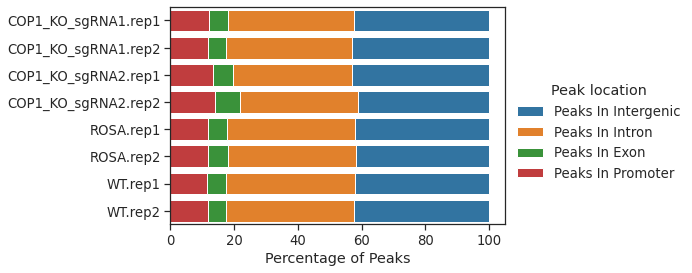

In [6]:
plot_df = perc_df.cumsum().reset_index().rename(columns={0:'location'}).copy()
value_cols = ['COP1_KO_sgRNA1.rep1', 'COP1_KO_sgRNA1.rep2', 'COP1_KO_sgRNA2.rep1', 'COP1_KO_sgRNA2.rep2', 'ROSA.rep1', 'ROSA.rep2', 'WT.rep1', 'WT.rep2']
plot_df = pd.melt(plot_df, id_vars=['location'], value_vars=value_cols)
with sns.axes_style('ticks'), sns.plotting_context('notebook', font_scale=1.2):
    sns.barplot(y='variable', x='value', hue='location', hue_order=locs[::-1], data=plot_df, dodge=False)
    plt.xlabel('Percentage of Peaks')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1, .7, 1, 0), loc=2, frameon=False, title='Peak location')
    #plt.savefig('peak_location.pdf')